# Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import pathlib
import cv2
import pandas as pd
import tensorflow as tf
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import image_dataset_from_directory
from keras.applications import MobileNet, MobileNetV2, MobileNetV3Large, MobileNetV3Small,\
    ResNet50, ResNet50V2, ResNet101, ResNet101V2, ResNet152V2, ResNet152V2, InceptionResNetV2,\
    EfficientNetB0, EfficientNetB1, EfficientNetV2S
    

print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Import and prepare data

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
print(data_dir)

# trainPath = r"C:\Users\gener\OneDrive\Documents\fruits360\fruits-360\Train"
# testPath = r"C:\Users\gener\OneDrive\Documents\fruits360\fruits-360\Test"

C:\Users\gener\.keras\datasets\flower_photos


In [ ]:
# roses = list(data_dir.glob('roses/*'))
# # img = cv2.imread(str(roses[100]))
# # print(img.shape)
# # print(roses[0])
# PIL.Image.open(str(roses[0]))

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


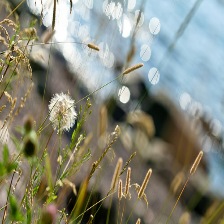

In [3]:
height, width = 224, 224
batch_size = 64
train, validation = image_dataset_from_directory(data_dir, validation_split=0.2, subset="both", seed=123,
                                     label_mode="categorical", image_size=(height,width), batch_size=batch_size)

# train = image_dataset_from_directory(trainPath, seed=123, label_mode="categorical",
#                                      image_size=(height,width), batch_size=batch_size)
# validation = image_dataset_from_directory(trainPath, seed=123, label_mode="categorical",
#                                      image_size=(height,width), batch_size=batch_size)

print(train.class_names)
print(validation.class_names)
num_classes = len(train.class_names)

for images, labels in train:
    # 'images' is a batch of images, and 'labels' is a batch of corresponding labels.
    # You can work with these batches to process the images and labels.
    # For example, if 'batch_size' is 32, 'images' will have shape (32, height, width, channels),
    # and 'labels' will have shape (32, num_classes), assuming one-hot encoded labels.

    # Iterate over individual images and their labels in the batch.
    for i in range(len(images)):
        img_np = images[i].numpy().astype("uint8")
        pil_image = PIL.Image.fromarray(img_np)
        display(pil_image)
        break
    break

# MobileNetV3 Models

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 960)              2996352   
 l)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 960)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               492032    
                                                                 
 dense_5 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 3,490,949
Trainable params: 494,597
Non-trainable params: 2,996,352
_________________________________________________________________
Epoch 1/20
46/46 [==============================] - 11s 169ms/step - loss: 0.4609 - accuracy: 0.8317 - v

<Axes: >

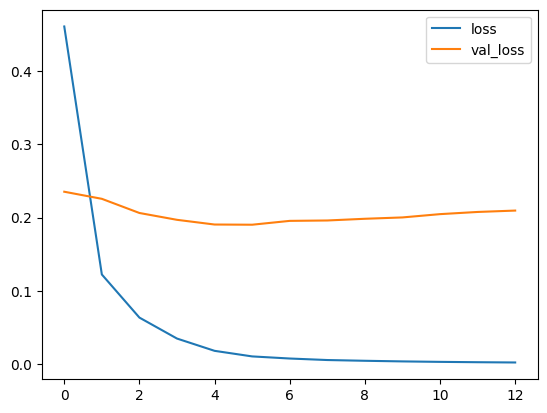

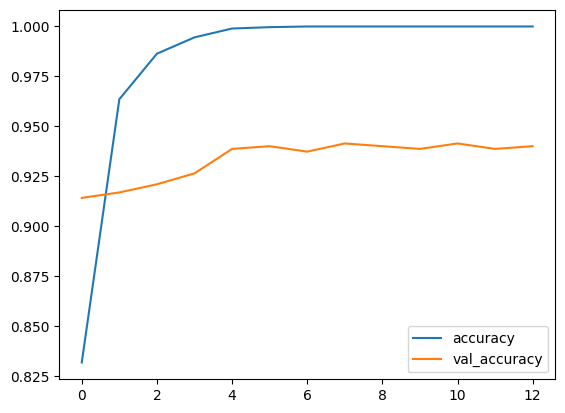

In [7]:
# MobileNetV3Large
# Create model
mobileNetv3Large_model = Sequential()
mobileNetv3Large_base = MobileNetV3Large(include_top=False, input_shape=(width, height, 3), pooling='avg', classes=5,
                      weights='imagenet')

mobileNetv3Large_base.trainable = False

mobileNetv3Large_model.add(mobileNetv3Large_base)
mobileNetv3Large_model.add(Flatten())
mobileNetv3Large_model.add(Dense(512, activation='relu'))
mobileNetv3Large_model.add(Dense(5, activation='softmax'))

# Check model parameters
mobileNetv3Large_model.summary()

# Train model
mobileNetv3Large_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
stop_early = EarlyStopping(monitor="val_accuracy", patience=5, min_delta=0.001, restore_best_weights=True)
mobileNetv3Large_history = mobileNetv3Large_model.fit(train, validation_data=validation, epochs=20, 
                                                      callbacks=[stop_early])

# Plot learning curves
history_frame = pd.DataFrame(mobileNetv3Large_history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()


# # MobileNetV3Small
# # Create model
# mobileNetv3Small_model = Sequential()
# mobileNetv3Small_base = MobileNetV3Small(include_top=False, input_shape=(width, height, 3), classes=131,
#                                          dropout_rate=0.5, weights='imagenet', pooling='avg')

# mobileNetv3Small_base.trainable = False

# mobileNetv3Small_model.add(mobileNetv3Small_base)
# mobileNetv3Small_model.add(Flatten())
# mobileNetv3Small_model.add(Dense(1024, activation='relu'))
# mobileNetv3Small_model.add(Dense(131, activation='softmax'))

# # Check model parameters
# mobileNetv3Small_model.summary()

# # Train model
# mobileNetv3Small_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# stop_early = EarlyStopping(monitor="val_accuracy", patience=5, min_delta=0.001, restore_best_weights=True)
# mobileNetv3Small_history = mobileNetv3Small_model.fit(train, validation_data=validation, epochs=50, 
#                                                       callbacks=[stop_early])

# # Plot learning curves
# history_frame = pd.DataFrame(mobileNetv3Small_history.history)
# history_frame.loc[:, ['loss', 'val_loss']].plot()
# history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

# MobileNet and MobileNetV2 models

In [19]:
# # MobileNet EXPERIMENT WITH POOLING AND OTHER PARAMETERS
# # Create model
# mobileNet_model = Sequential()
# mobileNet_base = MobileNet(include_top=False, input_shape=(width, height, 3), pooling='avg', classes=5,
#                       weights='imagenet')

# mobileNet_base.trainable = False

# mobileNet_model.add(mobileNet_base)
# mobileNet_model.add(Flatten())
# mobileNet_model.add(Dense(512, activation='relu'))
# mobileNet_model.add(Dense(5, activation='softmax'))

# # Check model parameters
# mobileNet_model.summary()

# # Train model
# mobileNet_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# stop_early = EarlyStopping(monitor="val_accuracy", patience=5, min_delta=0.001, restore_best_weights=True)
# mobileNet_history = mobileNet_model.fit(train, validation_data=validation, epochs=20, callbacks=[stop_early])

# # Plot learning curves
# history_frame = pd.DataFrame(mobileNet_history.history)
# history_frame.loc[:, ['loss', 'val_loss']].plot()
# history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()



# # MobileNetV2
# # Create model
# mobileNetv2_model = Sequential()
# mobileNetv2_base = MobileNetV2(include_top=False, input_shape=(width, height, 3), pooling='avg', classes=5,
#                       weights='imagenet')

# mobileNetv2_base.trainable = False

# mobileNetv2_model.add(mobileNetv2_base)
# mobileNetv2_model.add(Flatten())
# mobileNetv2_model.add(Dense(512, activation='relu'))
# mobileNetv2_model.add(Dense(5, activation='softmax'))

# # Check model parameters
# mobileNetv2_model.summary()

# # Train model
# mobileNetv2_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# stop_early = EarlyStopping(monitor="val_accuracy", patience=5, min_delta=0.001, restore_best_weights=True)
# mobileNetv2_history = mobileNetv2_model.fit(train, validation_data=validation, epochs=20, callbacks=[stop_early])

# # Plot learning curves
# history_frame = pd.DataFrame(mobileNetv2_history.history)
# history_frame.loc[:, ['loss', 'val_loss']].plot()
# history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

# EfficientNet

16705208/16705208 [==============================] - 2s 0us/step
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 1280)             4049571   
                                                                 
 flatten_16 (Flatten)        (None, 1280)              0         
                                                                 
 dense_32 (Dense)            (None, 512)               655872    
                                                                 
 dense_33 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 4,708,008
Trainable params: 658,437
Non-trainable params: 4,049,571
_________________________________________________________________
Epoch 1/50
46/46 [==============================] - 17s 257ms/step - loss: 0.4225 - accuracy: 0.8437 - v

<Axes: >

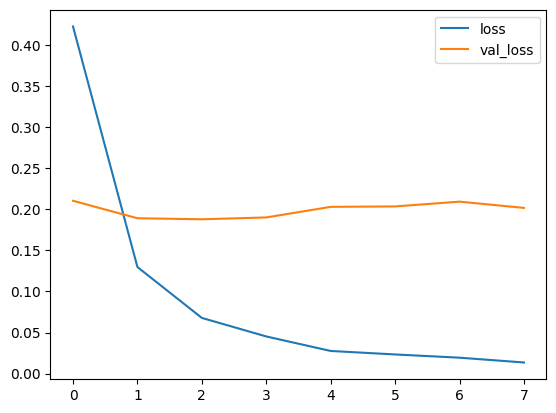

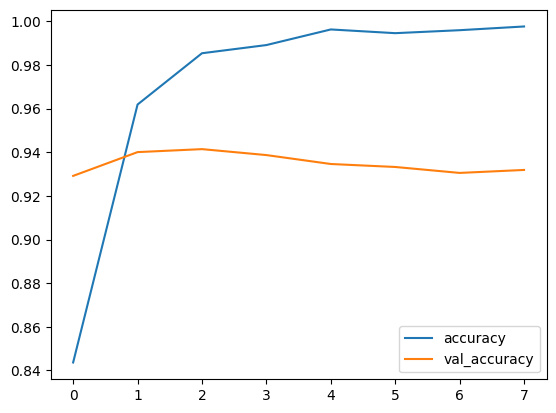

In [35]:
# EfficientNetB0
# Create model
efficientNetb0_model = Sequential()
efficientNetb0_base = EfficientNetB0(include_top=False, input_shape=(width, height, 3), classes=num_classes,
                                        weights='imagenet', pooling='avg')

efficientNetb0_base.trainable = False

efficientNetb0_model.add(efficientNetb0_base)
efficientNetb0_model.add(Flatten())
efficientNetb0_model.add(Dense(512, activation='relu'))
efficientNetb0_model.add(Dense(num_classes, activation='softmax'))

# Check model parameters
efficientNetb0_model.summary()

# Train model
efficientNetb0_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
stop_early = EarlyStopping(monitor="val_accuracy", patience=5, min_delta=0.001, restore_best_weights=True)
efficientNetb0_history = efficientNetb0_model.fit(train, validation_data=validation, epochs=50, 
                                                      callbacks=[stop_early])

# Plot learning curves
history_frame = pd.DataFrame(efficientNetb0_history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

27018416/27018416 [==============================] - 3s 0us/step
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional)  (None, 1280)             6575239   
                                                                 
 flatten_17 (Flatten)        (None, 1280)              0         
                                                                 
 dense_34 (Dense)            (None, 512)               655872    
                                                                 
 dense_35 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 7,233,676
Trainable params: 658,437
Non-trainable params: 6,575,239
_________________________________________________________________
Epoch 1/50
46/46 [==============================] - 18s 254ms/step - loss: 0.4084 - accuracy: 0.8498 - v

<Axes: >

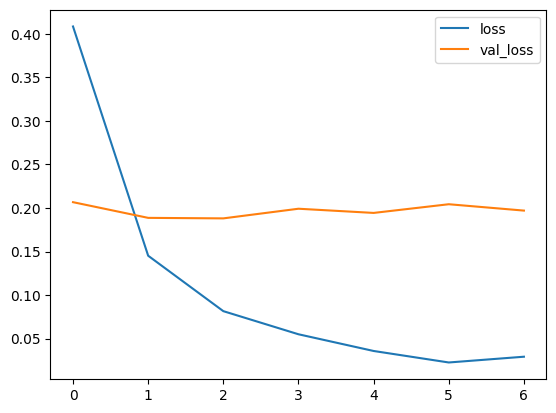

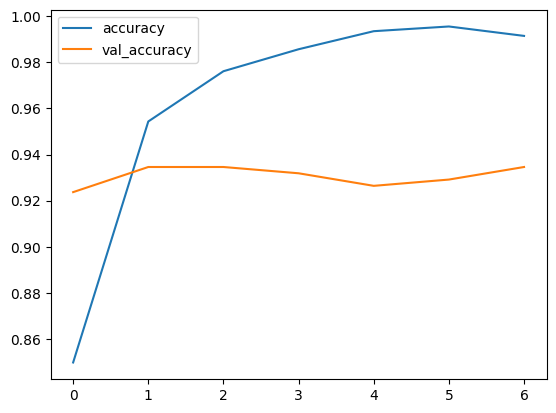

In [42]:
# EfficientNetB1
# Create model
efficientNetb1_model = Sequential()
efficientNetb1_base = EfficientNetB1(include_top=False, input_shape=(width, height, 3), classes=num_classes,
                                        weights='imagenet', pooling='avg')

efficientNetb1_base.trainable = False

efficientNetb1_model.add(efficientNetb1_base)
efficientNetb1_model.add(Flatten())
efficientNetb1_model.add(Dense(512, activation='relu'))
efficientNetb1_model.add(Dense(num_classes, activation='softmax'))

# Check model parameters
efficientNetb1_model.summary()

# Train model
efficientNetb1_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
stop_early = EarlyStopping(monitor="val_accuracy", patience=5, min_delta=0.001, restore_best_weights=True)
efficientNetb1_history = efficientNetb1_model.fit(train, validation_data=validation, epochs=50, 
                                                      callbacks=[stop_early])

# Plot learning curves
history_frame = pd.DataFrame(efficientNetb1_history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

82420632/82420632 [==============================] - 14s 0us/step
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-s (Functiona  (None, 1280)             20331360  
 l)                                                              
                                                                 
 flatten_18 (Flatten)        (None, 1280)              0         
                                                                 
 dense_36 (Dense)            (None, 512)               655872    
                                                                 
 dense_37 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 20,989,797
Trainable params: 658,437
Non-trainable params: 20,331,360
_________________________________________________________________
Epoch 1/50
46/46 [=================

<Axes: >

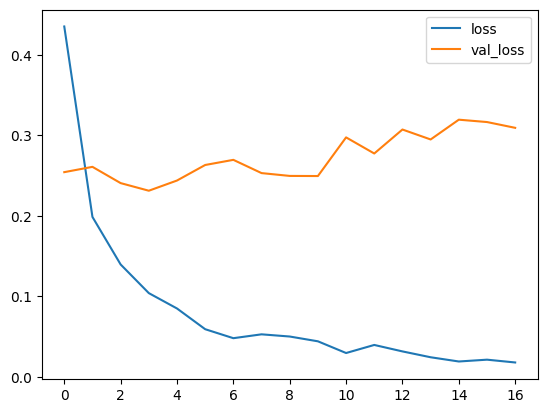

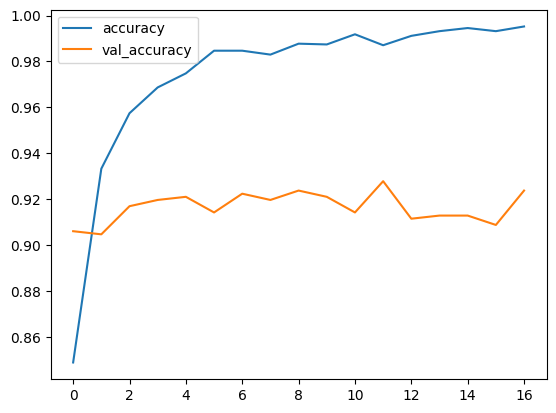

In [48]:
# EfficientNetV2S
# Create model
efficientNetv2s_model = Sequential()
efficientNetv2s_base = EfficientNetV2S(include_top=False, input_shape=(width, height, 3), classes=num_classes,
                                        weights='imagenet', pooling='avg')

efficientNetv2s_base.trainable = False

efficientNetv2s_model.add(efficientNetv2s_base)
efficientNetv2s_model.add(Flatten())
efficientNetv2s_model.add(Dense(512, activation='relu'))
efficientNetv2s_model.add(Dense(num_classes, activation='softmax'))

# Check model parameters
efficientNetv2s_model.summary()

# Train model
efficientNetv2s_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
stop_early = EarlyStopping(monitor="val_accuracy", patience=5, min_delta=0.001, restore_best_weights=True)
efficientNetv2s_history = efficientNetv2s_model.fit(train, validation_data=validation, epochs=50, 
                                                      callbacks=[stop_early])

# Plot learning curves
history_frame = pd.DataFrame(efficientNetv2s_history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

# Predict

In [17]:
img = cv2.imread(r"C:\Users\gener\OneDrive\Desktop\sunflower.jpg")
img_resized = cv2.resize(img, (height, width))
pil_image = PIL.Image.fromarray(img_resized)
display(pil_image)

img=np.expand_dims(img_resized, axis=0)         # FIGURE OUT WHY WE NEED TO EXPAND DIMS
print(img.shape)


prediction = mobileNet_history.predict(img)
print(prediction)
print(np.argmax(prediction))
print(train.class_names[np.argmax(prediction)])


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


# Save model

In [8]:
# efficientNetv2s_model.save(r"C:\Users\gener\OneDrive\Documents\cv-food-app\efficientNetv2s_model.h5")
mobileNetv3Large_model.save(r"C:\Users\gener\OneDrive\Documents\cv-food-app\mobileNetv3Largeavg_model.h5")